In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline


In [41]:
df = pd.read_csv("income.csv")

In [42]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


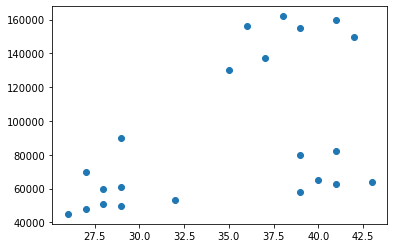

In [43]:
# Visulaize the data
plt.scatter(df["Age"],df["Income($)"])

In [44]:
# Look at plot seems like there will be 3 clusters

km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

# so it did!  return three clusters and assign them labels 0 1 2

/home/waqar/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [45]:
# append a clusters column into dataframe

df["clusters"] = y_predicted
df

,Name,Age,Income($),clusters
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


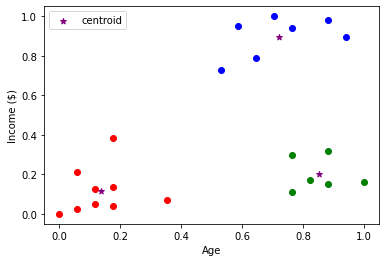

In [68]:
# let's plot it to better understand

df1 = df[df["clusters"] ==0]

df2 = df[df["clusters"] ==1]

df3 = df[df["clusters"] ==2]

plt.scatter(df1["Age"],df1["Income($)"], color='red')
plt.scatter(df2["Age"],df2["Income($)"], color='blue')
plt.scatter(df3["Age"],df3["Income($)"], color='green')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')

plt.legend()



# Preprocessing 

In [69]:
# Above there is problem as Red and Green clusters are not correctly grouped because of wrong scaling.
# we need to scale our both features using MinMax scaler.

scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [70]:
df.head()

,Name,Age,Income($),clusters
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [71]:
# Now use kmeans algorthim once again to train our scaled data

km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', "Income($)"]])
y_predicted

/home/waqar/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [72]:

df["clusters"] = y_predicted
df

,Name,Age,Income($),clusters
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [73]:
km.cluster_centers_      #these are three centroids

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

<function matplotlib.pyplot.legend(*args, **kwargs)>

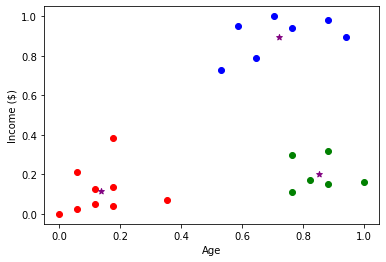

In [74]:
# let's plot it to better understand

df1 = df[df["clusters"] ==0]

df2 = df[df["clusters"] ==1]

df3 = df[df["clusters"] ==2]

plt.scatter(df1["Age"],df1["Income($)"], color='red')
plt.scatter(df2["Age"],df2["Income($)"], color='blue')
plt.scatter(df3["Age"],df3["Income($)"], color='green')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('Age')
plt.ylabel('Income ($)')

plt.legend


# Elbow Method

In [80]:
k_range = range(1,10)
sse = []    # sse --> sum of square error

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[["Age" , "Income($)"]])
    sse.append(km.inertia_)

/home/waqar/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/waqar/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/waqar/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/waqar/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/waqar/.local/lib/python3.10/si

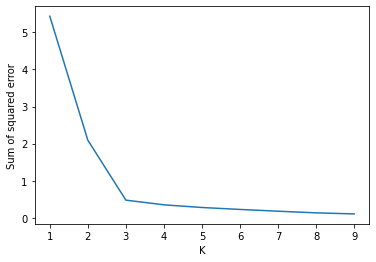

In [82]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)

# so here graph clearly shows by Elbow that there will be 3 clusters formed.